In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# Correction DS 1

## Partie 1

In [7]:
from math import *
import matplotlib.pyplot as plt
from time import time

In [12]:
%matplotlib notebook

In [8]:
def A(T,t,n):
    if n == 0:
        T.forward(t)
    else:
        t = t /sqrt(7)
        A(T,t,n-1)
        T.right(60)
        B(T,t,n-1)
        T.right(60)
        T.right(60)
        B(T,t,n-1)
        T.left(60)
        A(T,t,n-1)
        T.left(60)
        T.left(60)
        A(T,t,n-1)
        A(T,t,n-1)
        T.left(60)
        B(T,t,n-1)
        T.right(60)
        
def B(T,t,n):
    if n == 0:
        T.forward(t)
    else:
        t = t /sqrt(7)
        T.left(60)
        A(T,t,n-1)
        T.right(60)
        B(T,t,n-1)
        B(T,t,n-1)
        T.right(60)
        T.right(60)
        B(T,t,n-1)
        T.right(60)
        A(T,t,n-1)
        T.left(60)
        T.left(60)
        A(T,t,n-1)
        T.left(60)
        B(T,t,n-1)

In [9]:
class Turtle():
    def __init__(self,name="tortue",l = 1000, h = 500, d = 0., o = 90, xi = 500, yi = 250, nl = 1, c = "b"):
        """
        l est la largeur de la zone de tracé
        h est sa hauteur
        
        d est le temps d'attente entre deux affichages (en plus du temps nécessaire à l'affichage)
        
        o est l'orientation de départ en degrés dans le cercle trigonométrique 0 => vers la droite et 90 => vers le haut
        xi et yi sont les coordonnées de départ de la tortue
        
        nl permet d'afficher tous les nl traits pour gagner en vitesse d'exécution
        mettre à -1 pour un affichage uniquement à la fin (plus rapide), 10 pour un affichage tous les 10 traits par exemple
        
        c est la couleur du trait -par defaut bleu-
        
        certains traits ne s'affichent pas de temps en temps, 
        il faut terminer par un Turtle.show() pour avoir un affichage complet à la fin
        
        Code à modifier et à compléter en fonction des besoins
        """
        assert l > 0
        assert h > 0
        assert 0 <= xi <= l
        assert 0 <= yi <= h
        self.s = time
        self.name = name
        self.fig = plt.figure(name,figsize=(8,4))
        self.l = l
        self.h = h
        self.d = d
        self.oi = o # valeurs initiales pour le reset
        self.xi = xi
        self.yi = yi
        self.o = o
        self.n = 0
        self.nl = nl
        plt.axis('equal')
        plt.xlim([0,l])
        plt.ylim([0,h])
        plt.axis('off')
        self.x = [[xi]]
        self.y = [[yi]]
        self.nb = 1
        self.dessin = [None]
        self.ci = c
        self.color = [c]
        self.dessin[self.nb-1], = plt.plot(self.x[self.nb-1],self.y[self.nb-1],self.color[self.nb-1])
        self.show()
        
    def forward(self,t):
        """
        avance de t droit devant la tortue
        """
        self.x[self.nb-1].append(self.x[self.nb-1][-1]+t*cos(pi*self.o/180))
        self.y[self.nb-1].append(self.y[self.nb-1][-1]+t*sin(pi*self.o/180))
        self.n+=1
        if self.nl != -1 and self.n >= self.nl:
            self.n = 0
            self.show()
    
    def left(self,a):
        """
        tourne à gauche de a degrés
        """
        self.o += a
        while self.o >= 360:
            self.o -= 360
    
    def right(self,a):
        """
        tourne à droite de a degrés
        """
        self.o -= a
        while self.o < 0:
            self.o += 360
        
    def show(self):
        """
        efface le dessin et retrace la totalité
        """
        self.fig.clear()
        plt.clf()
        plt.axis('equal')
        plt.xlim([0,self.l])
        plt.ylim([0,self.h])
        plt.axis('off')
        for i in range(self.nb):
            self.dessin[i], = plt.plot(self.x[i],self.y[i],self.color[i])
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        t = self.s()
        while self.s()-t < self.d:
            pass
    
    def newline(self,color = "b",x=None,y=None):
        """
        démarre un nouveau dessin, par défaut en bleu au même point de départ que le premier
        sinon départ en x,y
        et couleur color
        """
        self.nb += 1
        self.color.append(color)
        if x is None:
            x = self.xi
        if y is None:
            y = self.yi
        self.x.append([x])
        self.y.append([y])
        self.dessin.append(None)
        self.dessin[self.nb-1], = plt.plot(self.x[self.nb-1],self.y[self.nb-1],self.color[self.nb-1])

    def goto(self,x,y):
        """
        déplace la tortue en x,y
        ces nouvelles coordonnées suivent les précédentes, un trait va donc les relier
        pour déplacer sans trait, préférer Turtle.newline(x,y)
        """
        self.x[self.nb-1].append(x)
        self.y[self.nb-1].append(y)
        self.show()
        
    def reset(self):
        """
        efface le dessin et revient à la position de départ, couleur de départ etc...
        """
        self.o = self.oi
        self.x = [[self.xi]]
        self.y = [[self.yi]]
        self.nb = 1
        self.color = [self.ci]
        self.dessin[self.nb-1], = plt.plot(self.x[self.nb-1],self.y[self.nb-1],self.color[self.nb-1])
        self.show()

<IPython.core.display.Javascript object>


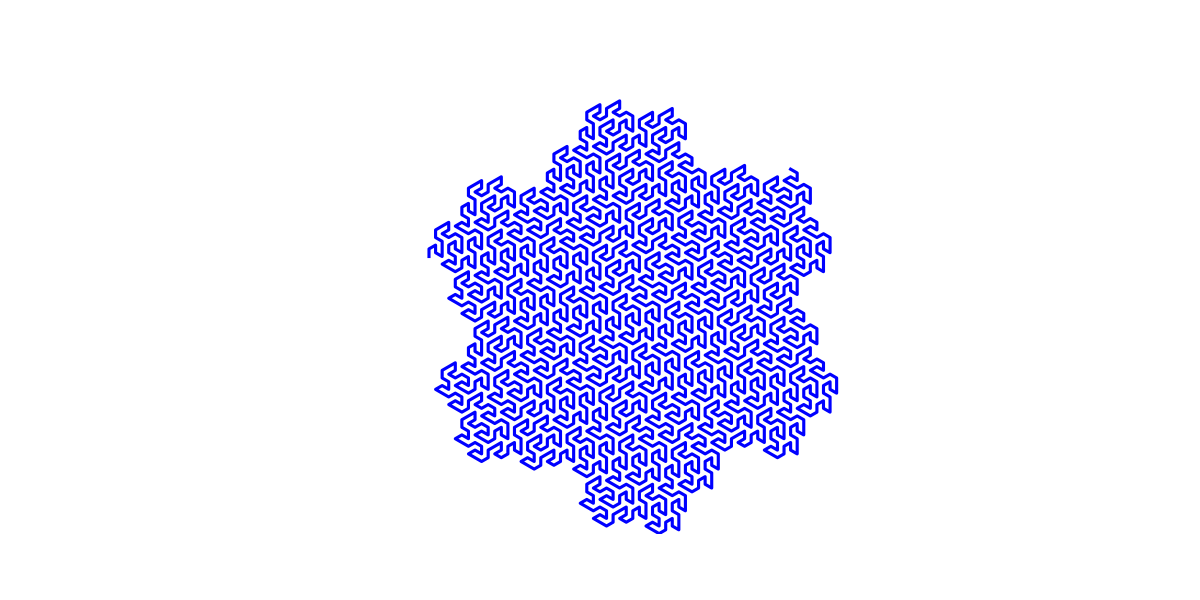

In [13]:
T = Turtle(name="generation 4",xi = 300, yi = 300, nl = 49)

A(T,400,4)
T.show()

<IPython.core.display.Javascript object>


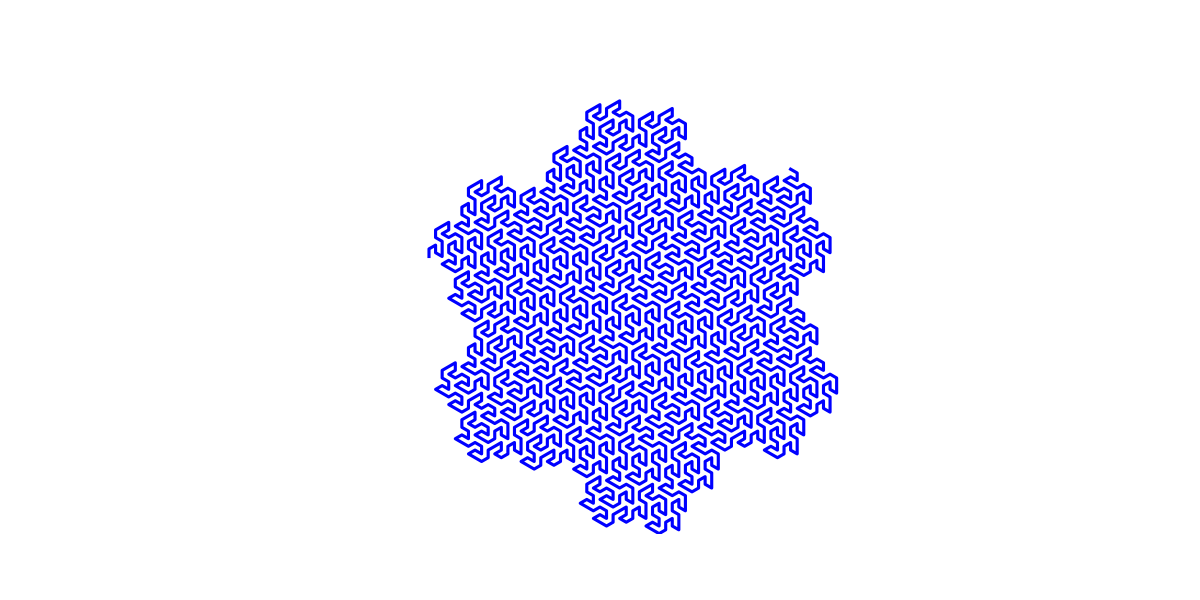

In [14]:
T2 = Turtle(name="generation 4 - affichage à la fin",xi = 300, yi = 300, nl = -1) # plus rapide

A(T2,400,4)
T2.show()

<IPython.core.display.Javascript object>


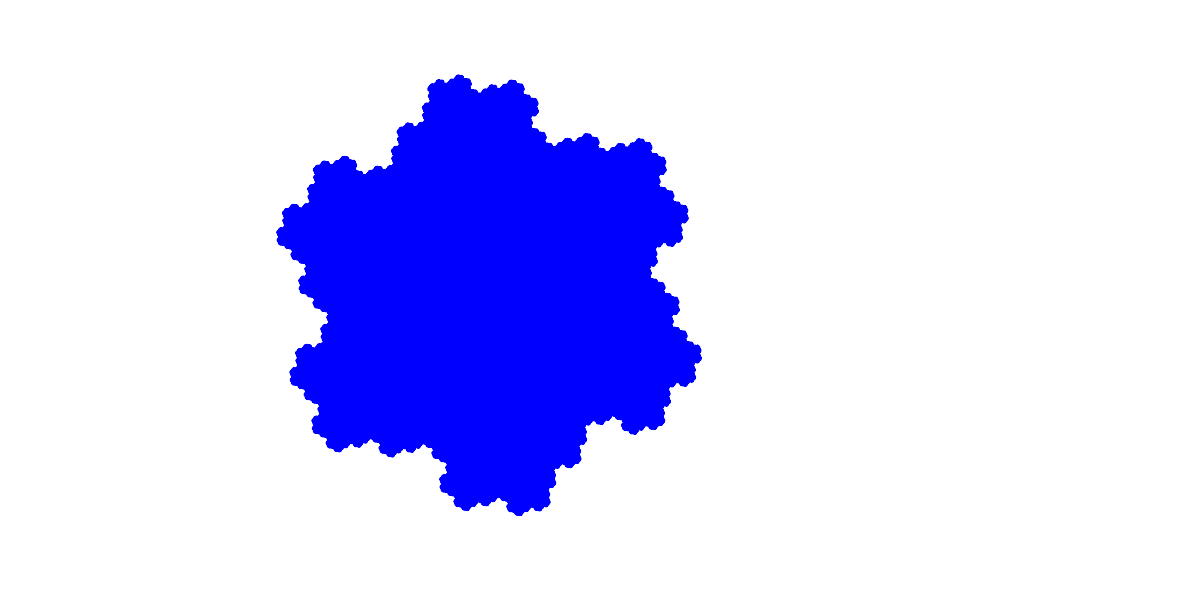

In [15]:
T3 = Turtle(name="generation 7 - zoomer avec l'outil rectangle sur une partie pour voir",xi = 300, yi = 480, nl = -1) 

A(T3,400,7)
T3.show()

<IPython.core.display.Javascript object>


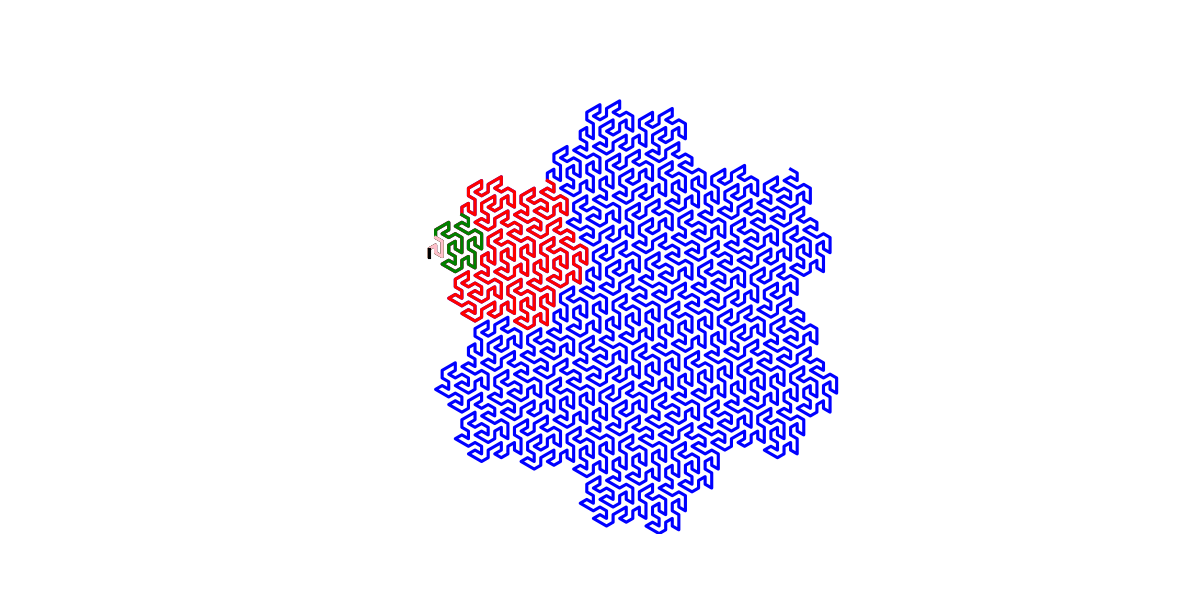

In [16]:
T4 = Turtle(name="Génération 0 à 4",xi = 300, yi = 300, nl = -1) 

A(T4,400,4) # génération 4 en bleu
T4.show()
T4.newline("r")
A(T4,400/sqrt(7),3) # génération 3 en rouge
T4.show()
T4.newline("g")
A(T4,400/7,2) # génération 2 en vert
T4.show()
T4.newline("pink")
A(T4,400/(7*sqrt(7)),1) # génération 1 en rose
T4.show()
T4.newline("black")
A(T4,400/49,0) # génération 0 en noir
T4.show()

In [17]:
def gosper(T,t,n,seq = "A-B--B+A++AA+B-"):
    """
    sans les fonctions A et B avec lecture des séquences
    """
    dico = {}
    dico["A"] = "A-B--B+A++AA+B-"
    dico["B"] = "+A-BB--B-A++A+B"
    dico["-"] = "-"
    dico["+"] = "+"
    if seq == "-":
        T.right(60)
    elif seq == "+":
        T.left(60)
    elif n == 0:
        T.forward(t)
    else:
        for val in seq:
            gosper(T,t/sqrt(7),n-1,dico[val])

<IPython.core.display.Javascript object>


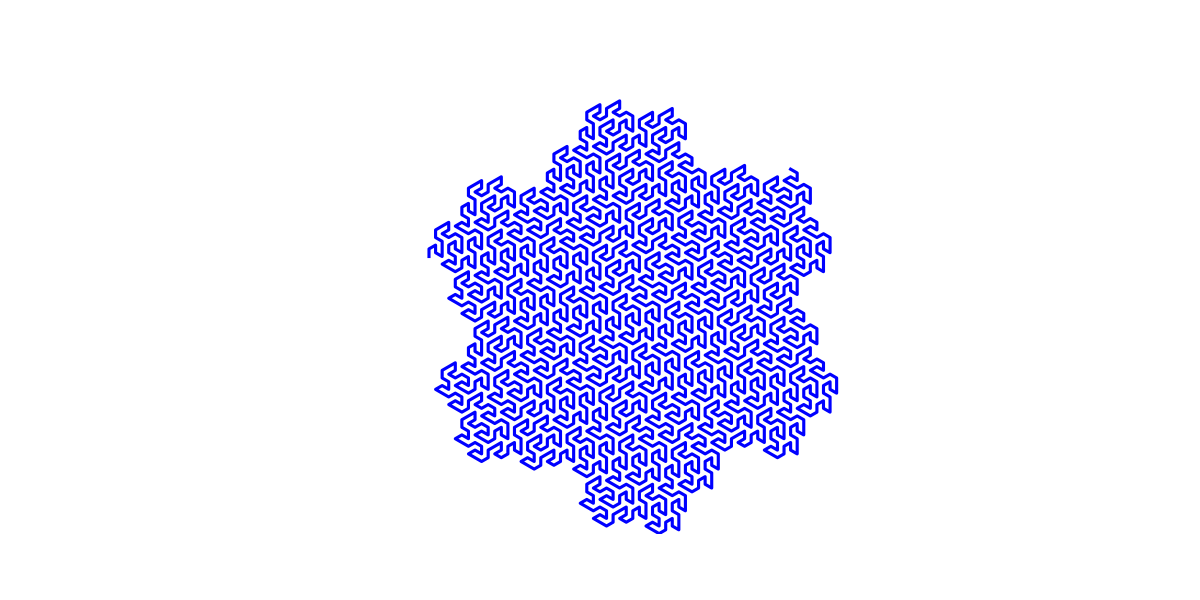

In [18]:
T5 = Turtle(name="gosper",xi = 300, yi = 300, nl = -1) 

gosper(T5,400,4)
T5.show()

## Partie 2

### Pile non bornée

In [19]:
def newStack():
    return []

def isEmpty(s):
    return s == []

def push(val, s):
    s.append(val)
    
def top(s):
    assert not isEmpty(s)
    return s[-1]

def pop(s):
    assert not isEmpty(s)
    return s.pop()

### Pile bornée

In [20]:
def newStack2(n):
    return [0]+[None]*n

def isEmpty2(s):
    return s[0] == 0

def push2(val, s):
    s[0] += 1
    s[s[0]] = val
    
def top2(s):
    assert not isEmpty2(s)
    return s[s[0]]

def pop2(s):
    assert not isEmpty2(s)
    val = s[s[0]]
    s[0] -= 1
    return val

### Programmation objet (non bornée)

In [21]:
class Stack():
    def __init__(self):
        self.data = []

    def isEmpty(self):
        return self.data == []

    def push(self,val):
        self.data.append(val)
    
    def top(self):
        assert not self.isEmpty()
        return self.data[-1]

    def pop(self):
        assert not self.isEmpty()
        return self.data.pop()

### Programmation objet (bornée)

In [22]:
class Stack2():
    def __init__(self, n = 1000):
        """
        pile de taille 1000 par défaut
        """
        self.maxsize = n
        self.data = [None]*n
        self.size = 0

    def isEmpty(self):
        return self.size == 0

    def push(self,val):
        assert self.size < self.maxsize
        self.size += 1
        self.data[self.size-1] = val
    
    def top(self):
        assert not self.isEmpty()
        return self.data[self.size-1]

    def pop(self):
        assert not self.isEmpty()
        val = self.data[self.size-1]
        self.size -= 1
        return val

In [23]:
def parentheses(expression):
    dico = {}
    dico["("] = ")"
    dico["["] = "]"
    dico["{"] = "}"
    pile = Stack()
    for val in expression:
        if val in dico.keys(): # val est un ouvrant
            pile.push(val) # on l'empile
        elif val in dico.values(): # val est un fermant
            if pile.isEmpty(): # si la pile est vide c'est mal parenthésé, on a des fermants en trop
                return False
            elif val != dico[pile.pop()]: # si le fermant ne correspond pas à l'ouvrant empilé; c'est mal parenthésé
                return False
        # le else est inutile, on ne traite pas les caractères autre que les parenthèses, crochets, etc...
    return pile.isEmpty() # si on arrive au bout de l'expression, si la pile est vide c'est bon, sinon c'est qu'il y a des ouvrants en trop 

In [24]:
parentheses("((3+4)/(5-7) + 2) * 4") # bonne

True

In [25]:
parentheses("((3+4)/(5-7) + 2) * 4)") # une fermante de trop

False

In [26]:
parentheses("((3+4)/(5-7) + 2 * 4") # une ouvrante de trop

False

In [27]:
parentheses("{[(3+4)/(5-7) + 2] * 4}") # bonne avec différentes parenthèses

True

In [28]:
parentheses("{[(3+4)/(5-7] + 2) * 4}") # bon nombre mais mal parenthésé

False

In [29]:
def parentheses2(expression): # autre solution
    pile = newStack()
    for val in expression:
        if val == "(" or val == "{" or val == "[":
            push(val,pile)
        elif val == ")" or val == "]" or val == "}":
            if isEmpty(pile):
                return False
            val2 = pop(pile)
            if (val == ")" and val2 != "(") or (val == "]" and val2 != "[") or (val == "}" and val2 != "{"):
                return False
    return isEmpty(pile)

In [30]:
parentheses2("((3+4)/(5-7) + 2) * 4") # bonne

True

In [31]:
parentheses2("((3+4)/(5-7) + 2) * 4)") # une fermante de trop

False

In [32]:
parentheses2("((3+4)/(5-7) + 2 * 4") # une ouvrante de trop

False

In [33]:
parentheses2("{[(3+4)/(5-7) + 2] * 4}") # bonne avec différentes parenthèses

True

In [34]:
parentheses2("{[(3+4)/(5-7] + 2) * 4}") # bon nombre mais mal parenthésé

False

## Partie 3

In [35]:
def somme(liste):
    if len(liste) == 1:
        return liste[0]
    else:
        return liste[0] + somme(liste[1:]) # il faut réduire la liste à chaque appel sinon, pas de terminaison
    # d'où le débordement de la pile d'appel 

In [36]:
somme([1,2,3,4,5])

15

In [39]:
def somme2(liste, a = 0): # recursivité terminale
    if len(liste) == 0:
        return a
    else:
        return somme(liste[1:], a = a + liste[0]) # il faut modifier a pour y stocker la somme et pas juste le premier element de la liste

In [40]:
somme2([1,2,3,4,5])

15

In [41]:
def somme_iter(liste):
    s = 0
    for val in liste:
        s += val
    return s

In [42]:
somme_iter([1,2,3,4,5])

15

In [43]:
def puiss(x,n):
    if n == 0:
        return 1 # il faut une condition d'arrêt x^0 = 1 pour tout x
    else:
        return x*puiss(x,n-1) # il faut que n diminue pour avoir terminaison

In [44]:
puiss(2,10)

1024

In [45]:
puiss(2,10000)

RecursionError: maximum recursion depth exceeded in comparison

La taille de la pile d'appel est trop petite (3000 appels imbriqués par défaut sur jupyter). sys.setrecursionlimit permet de changer la taille de cette pile d'appel afin de calculer le résultat.

In [46]:
import sys
sys.setrecursionlimit(15000)
puiss(2,10000)

1995063116880758384883742162683585083823496831886192454852008949852943883022194663191996168403619459789933112942320912427155649134941378111759378593209632395785573004679379452676524655126605989552055008691819331154250860846061810468550907486608962488809048989483800925394163325785062156830947390255691238806522509664387444104675987162698545322286853816169431577562964076283688076073222853509164147618395638145896946389941084096053626782106462142733339403652556564953060314268023496940033593431665145929777327966577560617258203140799419817960737824568376228003730288548725190083446458145465055792960141483392161573458813925709537976911927780082695773567444412306201875783632550272832378927071037380286639303142813324140162419567169057406141965434232463880124885614730520743199225961179625013099286024170834080760593232016126849228849625584131284406153673895148711425631511108974551420331382020293164095759646475601040584584156607204496286701651506192063100418642227590867090057460641785695191145605506

In [47]:
def puiss2(x,n):
    if n == 0:
        return 1 # il faut une condition d'arrêt x^0 = 1 pour tout x
    else:
        return x**(n%2)*puiss2(x,n//2)*puiss2(x,n//2) # si n pair, il existe k tel que n = 2k: x^(2k) = x^0 * x^(k) * x^(k)
                                                        # si n impair, il existe k tel que n = 2k +1: x^(2k+1) = x^1 * x^k * x^k

a°) et b°) L'idée est d'améliorer la complexité de la fonction puissance pour passer d'une complexité linéaire à une complexité logarithmique. Cependant, pour cela, il ne faut faire qu'un seul appel récursif à puiss2 dans le corps de la fonction afin d'éviter de recalculer des termes. 

In [48]:
def puiss2(x,n):
    if n == 0:
        return 1
    else:
        p = puiss2(x, n//2)
        return x**(n%2)*p*p

In [49]:
puiss2(2,10)

1024

In [50]:
def fib(n):
    if n==0 or n==1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

Pour fib(3), on a :  
n = 3, fib(2) en attente  
n = 2, fib(1) en attente  
n = 1, return 1, on dépile

n = 3, fib(2) en attente  
n = 2, 1 + fib(0) en attente  
n = 0, return 1, on dépile

n = 3, fib(2) en attente  
n = 2, 1 + 1 = 2 return 2, on dépile

n = 3, 2 + fib(1) en attente  
n = 1, return 1, on dépile

n = 3, 2 + 1 = 3 return 3, on dépile et on renvoie

La fonction fib a une **complexité exponentielle**, il est donc impossible d'obtenir fib(100) avec cette fonction.

In [51]:
# Deux solutions, mise en cache ou variables supplémentaires afin de conserver F(n-1) et F(n-2)

mem = [1, 1] # fib(0) et fib(1)
def fib2(n):
    global mem
    if n < len(mem):
        return mem[n]
    else:
        mem.append(fib2(n-1) + fib2(n-2))
        return mem[-1]

In [52]:
fib2(100)

573147844013817084101

In [53]:
def fib2_2(n,a = 1, b = 1): # a initialisé à F(1) et b à F(0)
    if n <= 1:
        return a
    else:
        return fib2_2(n-1, a+b, a)

In [54]:
fib2_2(100)

573147844013817084101

In [58]:
def fib3(n): # même principe que fib2_2 mais sans recursivité
    a = 1
    b = 1
    for i in range(2,n+1):
        a, b = a+b, a
    return a

In [57]:
fib3(100)

573147844013817084101